# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [90]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [91]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [92]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
k_means = KMeans(n_clusters=5, n_init=10, random_state=3)
k_means.fit(EMR3d1)
y_pred_KMeans1 = k_means.labels_
k_means.labels_

array([1, 2, 0, 4, 2, 3, 1, 2, 0, 3, 4, 2, 0, 4, 2, 3, 1, 2, 3, 0, 1, 2,
       3, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 2, 0, 4, 2, 3, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 3, 4, 2, 3, 1, 2, 3, 4, 2, 3, 3, 4, 2, 3, 4, 2, 3,
       4, 2, 3, 0, 4, 2, 3, 1, 2, 0, 1, 2, 3, 3, 4, 2, 3, 1, 2, 3, 1, 2,
       0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 3], dtype=int32)

### Make a 3D chart

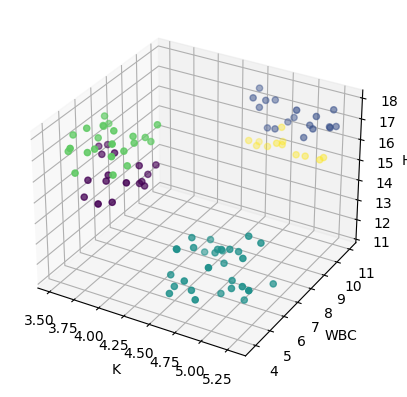

In [93]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Task 1 (_max score - 50 points_)
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class.
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Check your algorithm on 'EMR-Blood.xlsx' dataset. Compare your results to the _sklearn_ version - what can affect any differences you might've got?

In [94]:
# Add your code for task1 after this line, and keep it in this cell.

# Implement K-Means (X being the data)
class k_means:
    def __init__(self, k, random_seed=1, num_iter=50, min_distance=1e-6, centroid_set='kmeans++'):
        self.k = k
        self.min_distance = min_distance
        self.random_seed = random_seed
        self.centroid_set = centroid_set

    def kmeanspp_centroids(self, X):
      centroids = []
      centroid_id = np.random.choice(X.shape[0])
      centroids.append(X[centroid_id])
      for _ in range(self.k-1):
        dists = []
        for x in X:
            distances = np.sqrt(np.sum((x-centroids)**2,axis=1))
            dists.append(distances.min())
        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)
      return np.array(centroids)

    def lloyd(self, X):
      n = X.shape[1]
      min_max_X = np.array([X.T.min(axis=1), X.T.max(axis=1)])
      centroids = []
      for i in range(n):
          centroids.append(np.random.uniform(low=min_max_X[0,i],high=min_max_X[1,i], size=(self.k)))
      centroids = np.array(centroids).T
      return centroids

    def random_from_data(self,X):
        n = X.shape[0]
        ind = np.random.choice(range(n), self.k, replace=False)
        centroids = X[ind]
        return centroids

    def fit(self, X, n_iteration=150):
        np.random.seed(self.random_seed)
        match self.centroid_set:
          case 'kmeans++':
            centroids = self.kmeanspp_centroids(X)
          case 'random_from_data':
            centroids = self.random_from_data(X)
          case 'lloyd':
            centroids = self.lloyd(X)

        for i in range(n_iteration):
            distance = ((X-np.expand_dims(centroids, axis=1))**2)
            distance = np.sqrt(np.sum(distance, axis=2))
            labels = np.argmin(distance.T, axis=1)
            WCSS_new = np.sum((X-centroids[labels])**2)
            if i>0 and np.abs(WCSS - WCSS_new) < self.min_distance:
                break
            else:
                WCSS = WCSS_new
                centroids = np.array([np.mean(X[labels == x], axis=0) for x in range(self.k)])

        self.WCSS = WCSS
        self.centroids = centroids
        self.labels = labels

    def predict(self, X):
        distance = ((X-np.expand_dims(self.centroids, axis=1))**2)
        distance = np.sqrt(np.sum(distance, axis=2))
        labels = np.argmin(distance.T, axis=1)
        return labels

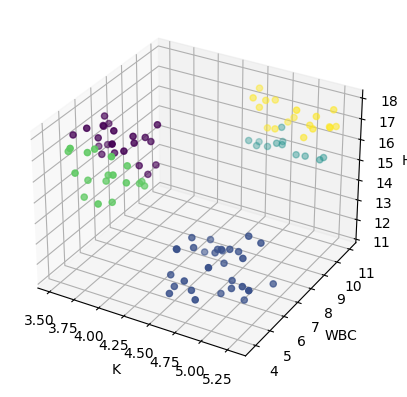

In [95]:
k = 5
"""
X = np.array([[2, 3, 4],[2, 1, 2],[5, 6, 7],[7, 8, 9],[4,5,6],[3, 4, 5]])
k=2
kmeans = k_means(k)
kmeans.fit(X)
print(kmeans.labels)
print(kmeans.predict(np.array([[3,4,8]])))
"""
kmeans = k_means(k, random_seed=5, centroid_set='kmeans++')
kmeans.fit(EMR3d1)
make_chart(EMR3d1, kmeans.labels, variables1)


## Task 2 (_max score - 30 points_)

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart (for your implementation of K-Means algorithm)

Difference of WCSS between k = 1 and 2  :  579.7291234285715
Difference of WCSS between k = 2 and 3  :  265.8879419047619
Difference of WCSS between k = 3 and 4  :  25.604361818181815
Difference of WCSS between k = 4 and 5  :  21.586256666666685
Difference of WCSS between k = 5 and 6  :  14.24659382284382
Difference of WCSS between k = 6 and 7  :  9.935684965034952
Difference of WCSS between k = 7 and 8  :  16.27844292083735
Difference of WCSS between k = 8 and 9  :  6.155445037315623
Difference of WCSS between k = 9 and 10  :  3.6376772727272737
Difference of WCSS between k = 10 and 11  :  2.2166119444444305
Optimal k=3


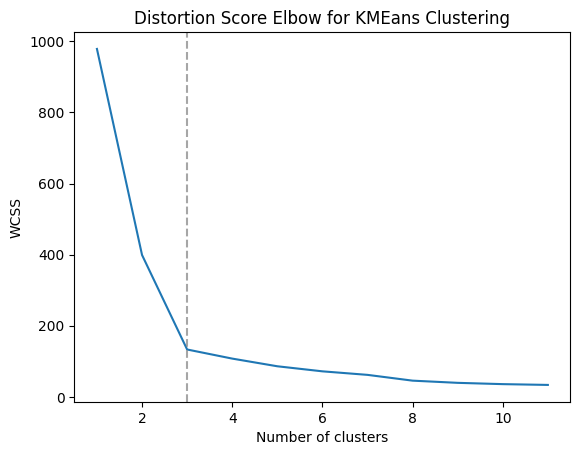

In [96]:
# Add your code for task2 after this line, and keep it in this cell.
WCSSs = []
WCSSs_dif = {}
for k in range(1,12):
  model = k_means(k)
  model.fit(EMR3d1)
  labels2 = model.centroids
  #make_chart(EMR3d1, labels2, variables1, k)
  WCSSs.append(model.WCSS)
  if k != 1:
    dif = {f'Difference of WCSS between k = {k-1} and {k}': WCSSs[k-2]-WCSSs[k-1]}
    WCSSs_dif.update(dif)
for key, value in WCSSs_dif.items():
    print(key, ' : ', value)
WCSSs_dif_list = list(WCSSs_dif.values())
minimum = WCSSs_dif_list[2]/WCSSs_dif_list[1]
optimal_k = -1
for i in range(len(WCSSs_dif_list)-1):
  if (WCSSs_dif_list[i+1]/WCSSs_dif_list[i]) <= minimum:

    minimum = WCSSs_dif_list[i+1]/WCSSs_dif_list[i]
    optimal_k = i+2

print('Optimal k=%i'%optimal_k)


plt.plot(range(1, 12), WCSSs)
plt.axvline(x=optimal_k, color='gray', alpha=0.7, linestyle='--')
plt.title('Distortion Score Elbow for KMEans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

$$k_{opt} = argmin(\frac{diffwcss_{k+1}-diffwcss_{k}}{diffwcss_{k}-diffwcss_{k-1}})$$

From a graph and difference of WCSS for different k, we see that k optimal are 3. After k=3 difference of WCSS changes more slowly than before.

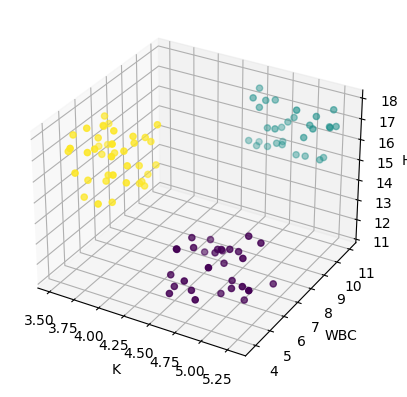

In [97]:
kmeans = k_means(3)
kmeans.fit(EMR3d1)
make_chart(EMR3d1, kmeans.labels, variables1)

### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

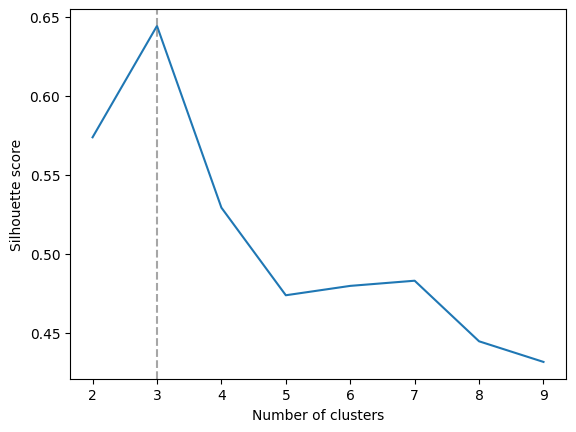

In [98]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score

def plot_Silhouette(X, num_clusters=range(2, 5)):
    silhouette = []
    for k in num_clusters:
        kmeans = k_means(k)
        kmeans.fit(X)
        silhouette.append(silhouette_score(X, kmeans.labels, metric='euclidean'))
    plt.plot(num_clusters, silhouette)
    plt.axvline(x=np.argmax(silhouette)+2, color='gray', alpha=0.7, linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')

plot_Silhouette(EMR3d1, range(2,10))

#### From this section on - please use the sklearn's K-means

## Part 2: Mixture Models Clustering

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

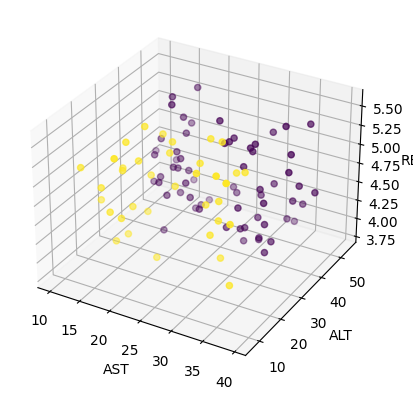

In [99]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["AST","ALT","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
k_means = KMeans(n_clusters=2, n_init=10)
k_means.fit(EMR3d2)
y_pred_KMeans2 = k_means.labels_

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2);

## Task 3 (_max score - 20 points_)
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this separation?

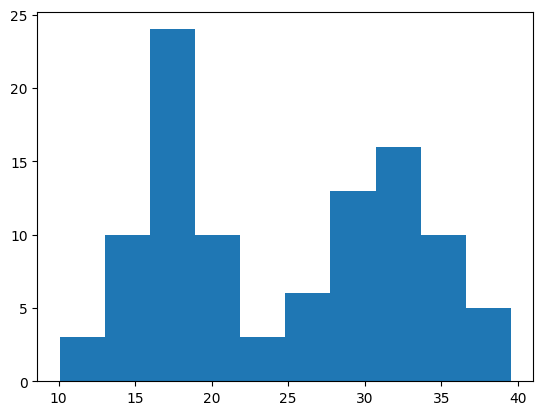

In [100]:
plt.hist(EMR3d2[:,0]);

In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorithm with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

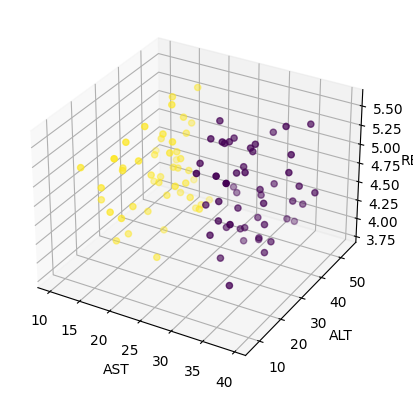

In [101]:
# Add your code for task3 after this line, and keep it in this cell.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
ast = sheet1.loc[:, ["AST"]].values
gmm.fit(ast)
labels = gmm.predict(ast)
#print(labels)

make_chart(EMR3d2, labels, variables2);

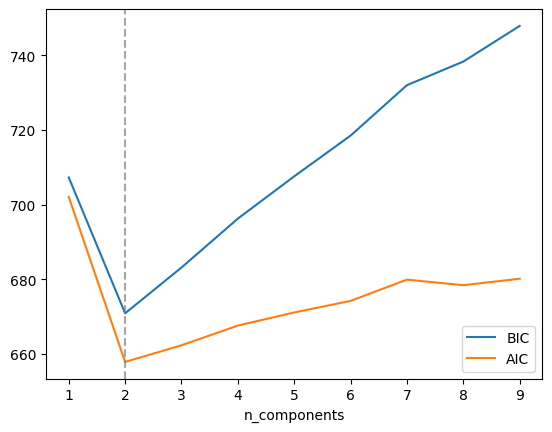

In [103]:
n_components = np.arange(1, 10)
clfs = [GaussianMixture(n, max_iter = 1000).fit(ast) for n in n_components]
bics = [clf.bic(ast) for clf in clfs]
aics = [clf.aic(ast) for clf in clfs]

plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.axvline(x=np.argmax(aics)+2, color='gray', alpha=0.7, linestyle='--')
plt.xlabel('n_components')
plt.legend()
plt.show()

Hense proper number of components is 2.

What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?

*The problem with the separation achieved using K-Means in your case is that this algorithm assumes that clusters in the data are spherical and roughly of equal size. However:*

**Uniform Distribution (RBC):** *K-Means is inefficient as there are no clear clusters in such a distribution.*

**Gaussian Distribution (ALT):** *K-Means performs well if clusters are well separated and of similar size.*

**Mixture of Two Gaussian Distributions (AST):** *K-Means struggles as it cannot effectively differentiate overlapping clusters.*

*Overall, K-Means does not account for complex or irregular data distributions, leading to technically correct but impractical separation. Other algorithms, such as Gaussian Mixture Models (GMM), are better suited for data with complex distributions.*
butions.n the data.




# Good Luck!

